# Oblig 2 - INFO284

### Imports of libraries

In [323]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()

In [324]:
from sklearn.mixture import GaussianMixture
from sklearn.cluster import KMeans

### Import dataset file

In [325]:
df = pd.read_csv('../../../datasets/second_assignment/seeds_dataset_backup.txt', sep="\s+", names = ["area", "perimeter", "compactness", "kernel_length", "kernel_width", "asymmetry_coeff", "kernel_groove_len", "wheat_type"])

In [326]:
df.head(10)

,area,perimeter,compactness,kernel_length,kernel_width,asymmetry_coeff,kernel_groove_len,wheat_type
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,1
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,1
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,1
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,1
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,1
5,14.38,14.21,0.8951,5.386,3.312,2.462,4.956,1
6,14.69,14.49,0.8799,5.563,3.259,3.586,5.219,1
7,14.11,14.10,0.8911,5.420,3.302,2.700,5.000,1
8,16.63,15.46,0.8747,6.053,3.465,2.040,5.877,1
9,16.44,15.25,0.8880,5.884,3.505,1.969,5.533,1


In [327]:
df.describe()

,area,perimeter,compactness,kernel_length,kernel_width,asymmetry_coeff,kernel_groove_len,wheat_type
count,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000
mean,14.847524,14.559286,0.870999,5.628533,3.258605,3.700201,5.408071,2.000000
std,2.909699,1.305959,0.023629,0.443063,0.377714,1.503557,0.491480,0.818448
min,10.590000,12.410000,0.808100,4.899000,2.630000,0.765100,4.519000,1.000000
25%,12.270000,13.450000,0.856900,5.262250,2.944000,2.561500,5.045000,1.000000
50%,14.355000,14.320000,0.873450,5.523500,3.237000,3.599000,5.223000,2.000000
75%,17.305000,15.715000,0.887775,5.979750,3.561750,4.768750,5.877000,3.000000
max,21.180000,17.250000,0.918300,6.675000,4.033000,8.456000,6.550000,3.000000


### Visualize unprocessed data

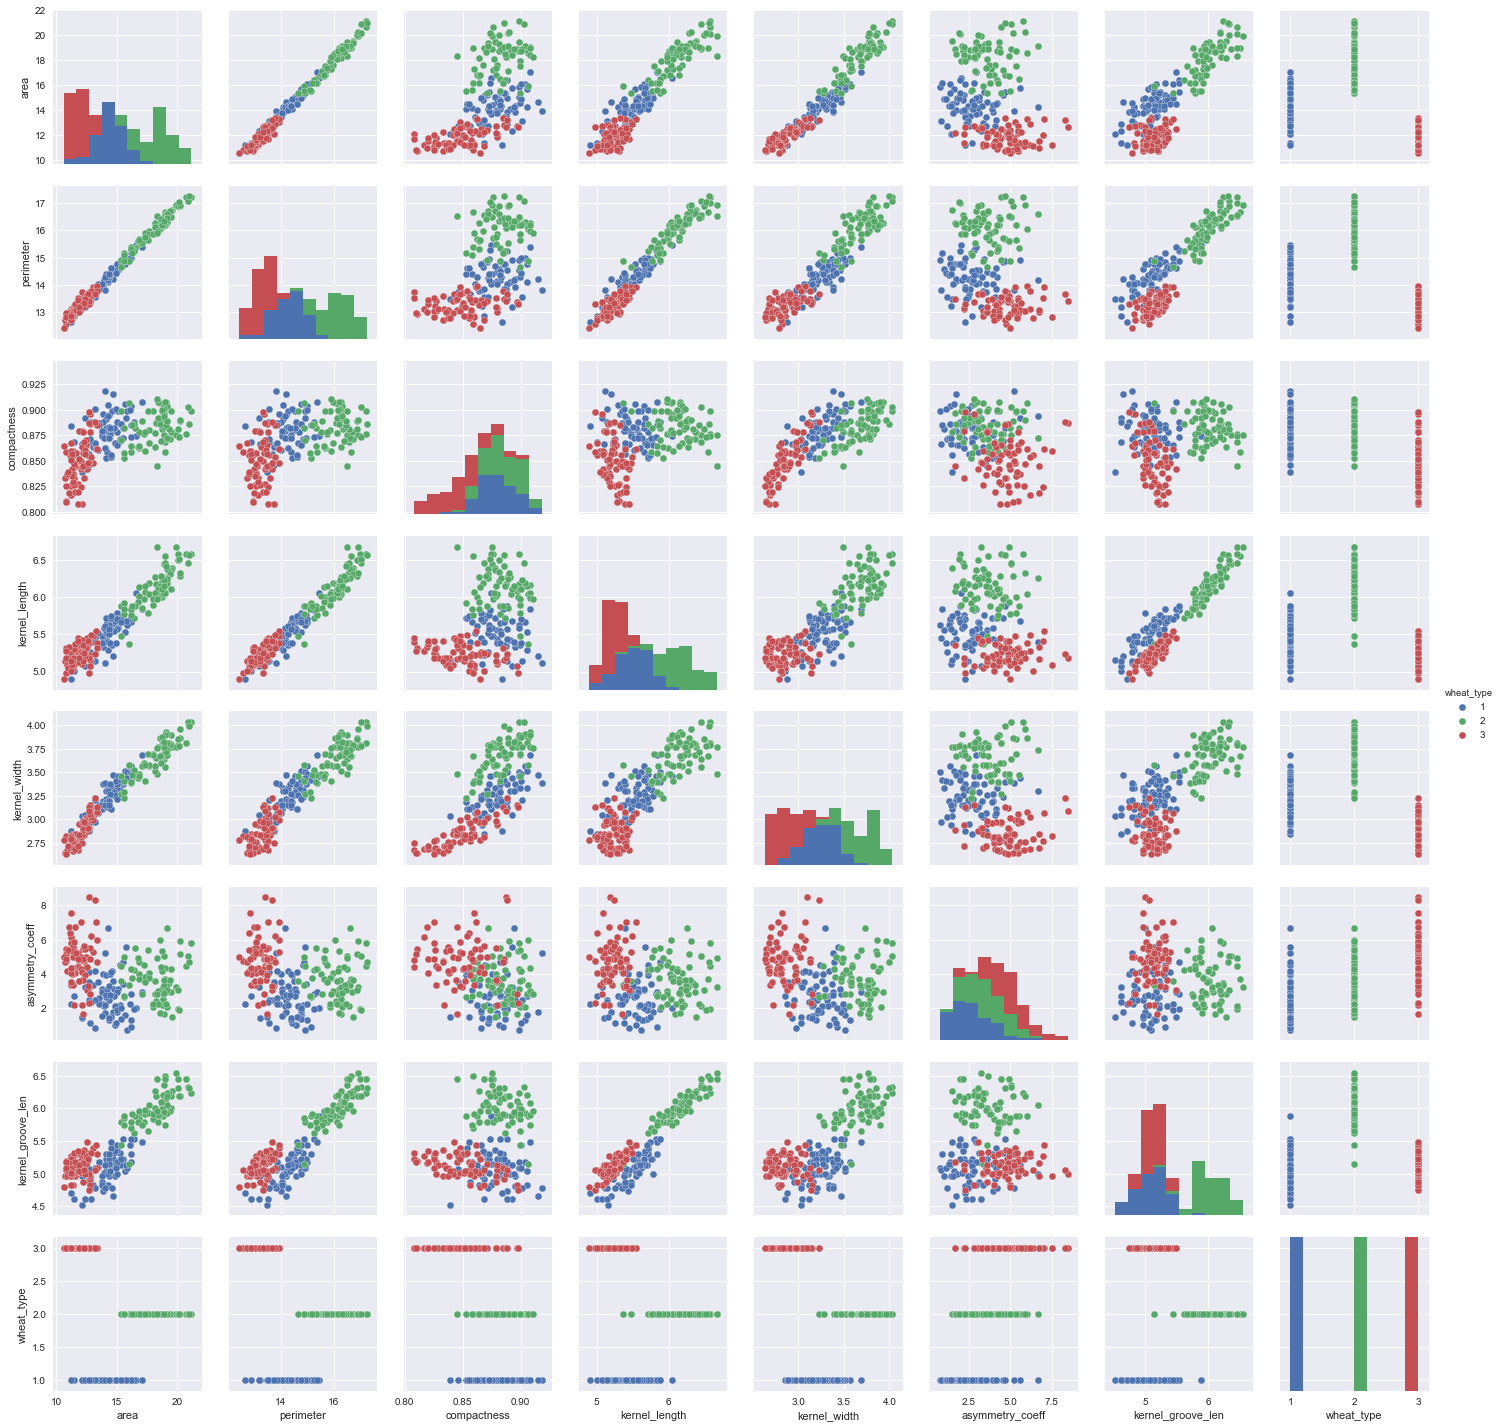

In [328]:
sns.pairplot(df, hue="wheat_type")

### Clean and process data

In [390]:
## Drop pre-made classification of types
cleaned_set = df.drop(["wheat_type", "perimeter"], 1)

In [391]:
## Scale the feature values
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
cleaned_set[cleaned_set.columns] = scaler.fit_transform(cleaned_set[cleaned_set.columns])

In [392]:
cleaned_set.describe()

,compactness,kernel_length,kernel_width,asymmetry_coeff,kernel_groove_len
count,210.000000,210.000000,210.000000,210.000000,210.000000
mean,0.570767,0.410773,0.448043,0.381633,0.437751
std,0.214423,0.249473,0.269219,0.195498,0.241989
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.442831,0.204533,0.223806,0.233575,0.258986
50%,0.593013,0.351633,0.432644,0.368474,0.346627
75%,0.723004,0.608530,0.664113,0.520570,0.668636
max,1.000000,1.000000,1.000000,1.000000,1.000000


### Fit data with K-Means clustering

In [393]:
from sklearn.cluster import KMeans

In [394]:
k_cluster = KMeans(n_clusters=3, random_state=0)

In [395]:
k_cluster.fit(cleaned_set)
k_cluster.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 2, 2, 1, 2, 2, 2, 2])

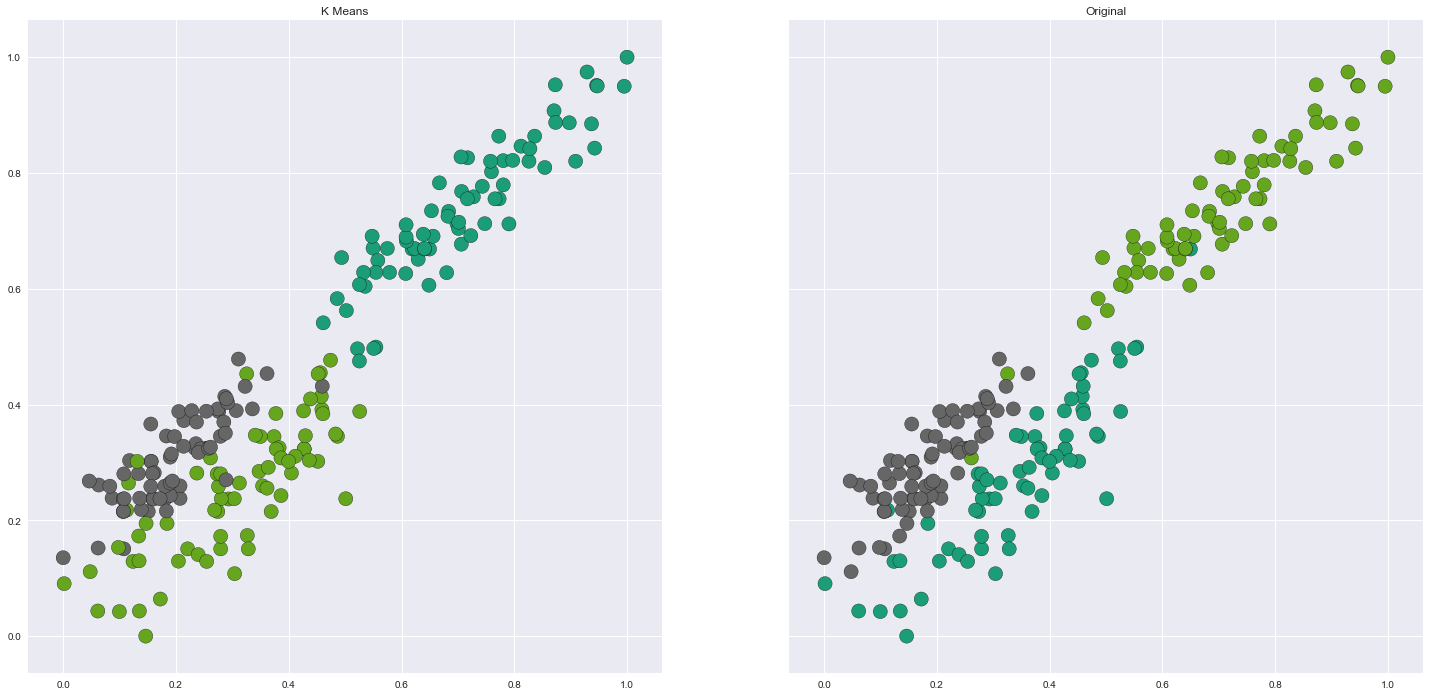

In [396]:
fig, (ax1, ax2) = plt.subplots(1, 2, sharey=True, figsize=(25,12), squeeze=True)

ax1.set_title("K Means")
ax1.scatter(cleaned_set["kernel_length"], cleaned_set["kernel_groove_len"], c=k_cluster.labels_, cmap='Dark2', s=200, edgecolors='black')

ax2.set_title("Original")
ax2.scatter(cleaned_set["kernel_length"], cleaned_set["kernel_groove_len"], c=df["wheat_type"], cmap='Dark2', s=200, edgecolors='black')

## Fit data with Gaussian mixture models clustering

In [397]:
from sklearn.mixture import GaussianMixture

In [398]:
g_cluster = GaussianMixture(n_components=3, random_state=0).fit(cleaned_set)

In [399]:
labels = g_cluster.predict(cleaned_set)
labels

array([2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2,
       2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 0, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 2, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

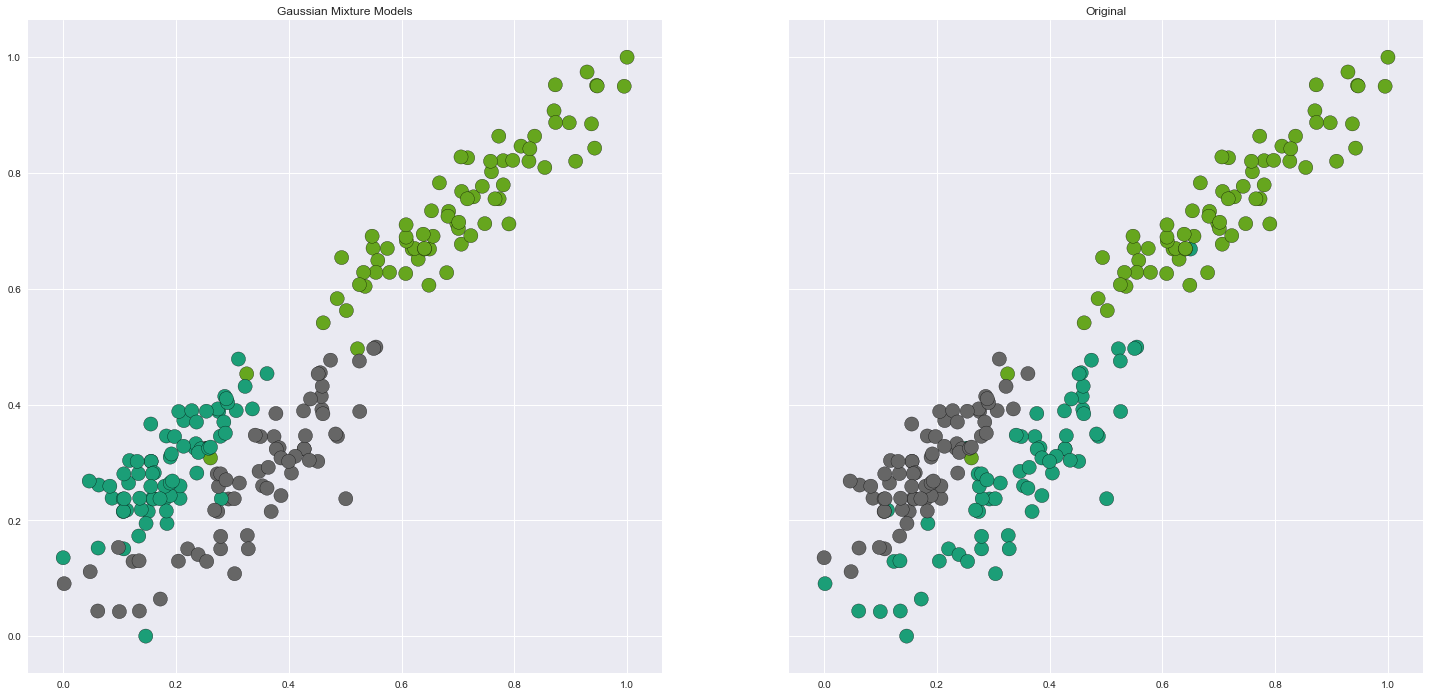

In [400]:
fig, (ax1, ax2) = plt.subplots(1, 2, sharey=True, figsize=(25,12), squeeze=True)

ax1.set_title("Gaussian Mixture Models")
ax1.scatter(cleaned_set["kernel_length"], cleaned_set["kernel_groove_len"], c=labels, cmap='Dark2', s=200, edgecolors='black')

ax2.set_title("Original")
ax2.scatter(cleaned_set["kernel_length"], cleaned_set["kernel_groove_len"], c=df["wheat_type"], cmap='Dark2', s=200, edgecolors='black')